In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from sklearn.model_selection import train_test_split   #导入需要用的库

In [159]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 12,   
    'axes.unicode_minus': False 
}
rcParams.update(config)   #调节字体

In [160]:
path = '/Users/Xy/Desktop/ML ppt/regress_data1.csv'

data = pd.read_csv(path) #读入数据
data.head()   

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [161]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]
y_data = data.iloc[:,cols-1:]
X_data.insert(0, 'Ones', 1)#让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [162]:
X=X_data.values
Y=y_data.values
W=np.array([[0.0],[0.0]])
(X.shape,Y.shape, W.shape)

((97, 2), (97, 1), (2, 1))

In [163]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=15)  #划分训练集/测试集

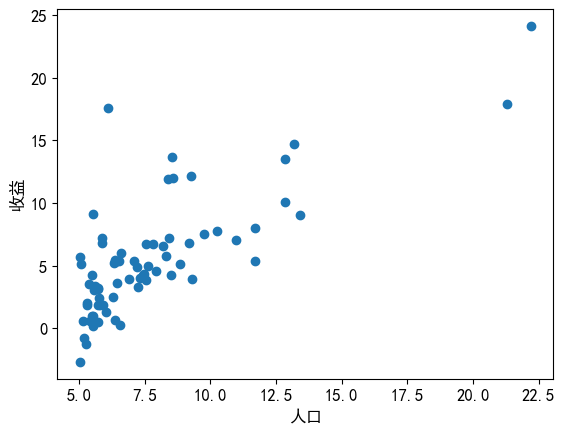

In [164]:
plt.scatter(x_train[:, 1:2], y_train)
plt.xlabel('人口')
plt.ylabel('收益')
plt.show()

        上图是原数据

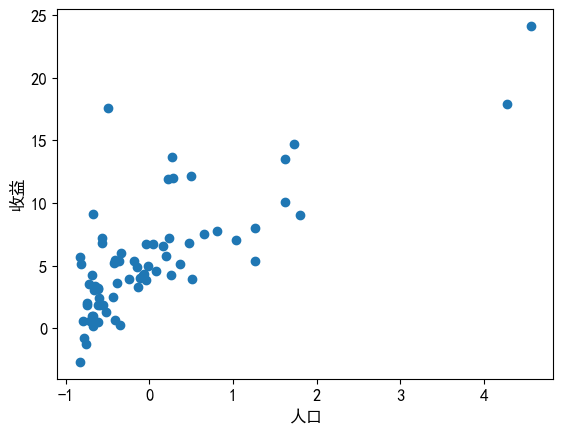

In [165]:
x_test[:, 1:2]=(x_test[:, 1:2] - x_train[:, 1:2].mean()) / x_train[:, 1:2].std()
x_train[:, 1:2]= ( x_train[:, 1:2]- x_train[:, 1:2].mean() )/ x_train[:, 1:2].std()
#对数据进行标准化
plt.scatter(x_train[:, 1:2], y_train)
plt.xlabel('人口')
plt.ylabel('收益')
plt.show()

        上图是归一化后的数据，与原始数据相比，散点分布趋势相同，但是坐标范围发生了变化

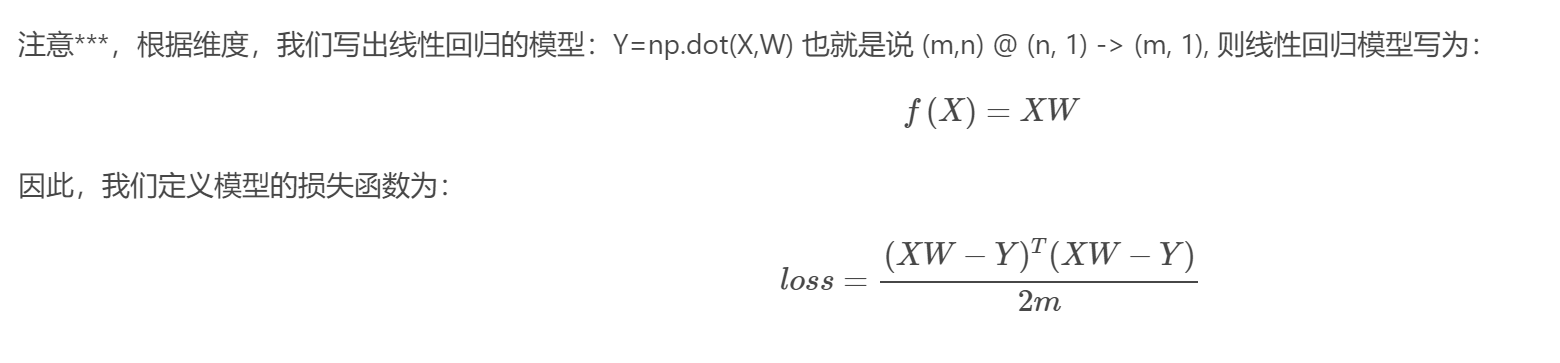

In [175]:
my_lambda= 0.01
def computeCost(X, Y, W):
    Y_hat = np.dot(X,W)
    loss = np.sum((Y_hat - Y) ** 2) / (2 * X.shape[0]) + (my_lambda/ 2) * np.sum(W ** 2)
    return loss

        L2范数正则化

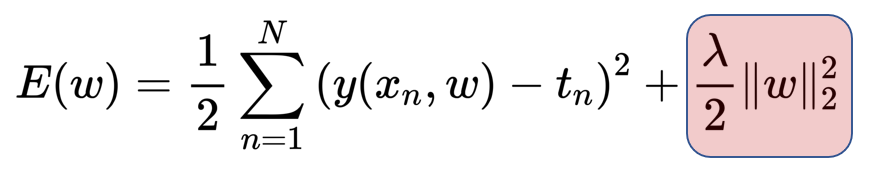

In [176]:
def gradientDescent(X, Y, W, alpha):     
    Y_hat = np.dot(X,W)        
    dW = (np.dot(X.T, (Y_hat - Y))/ X.shape[0] )+ my_lambda * W
    W += -alpha * dW
    return W

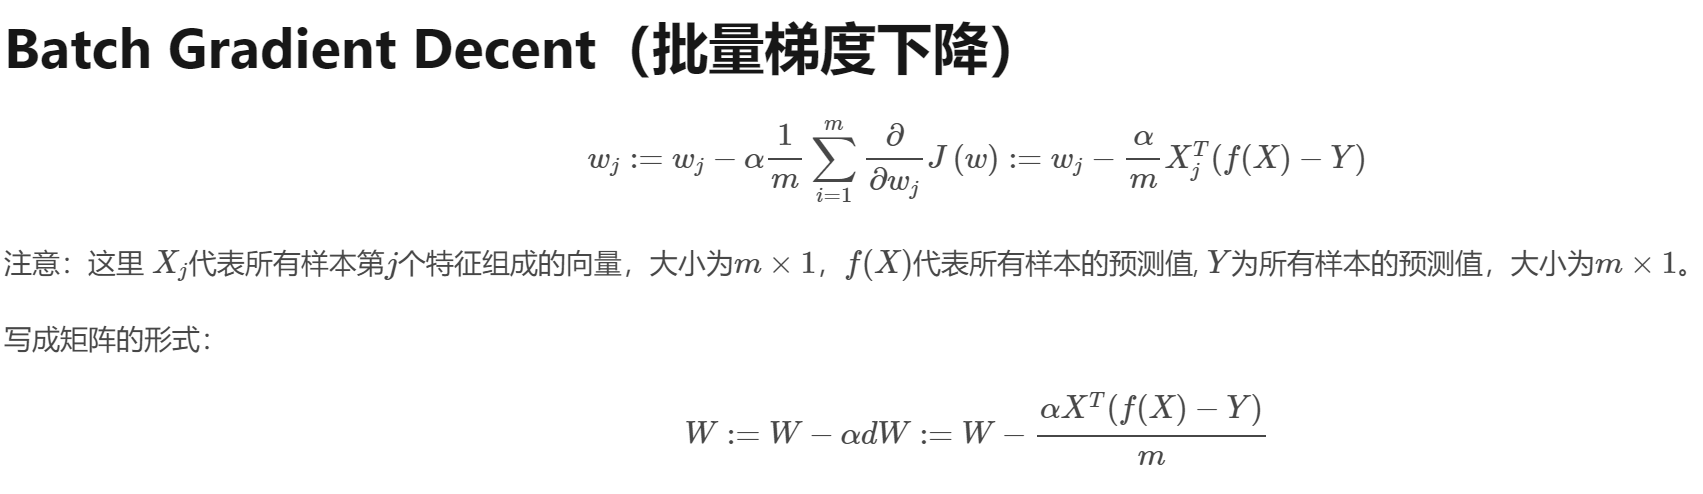

        加入L2范数正则化后

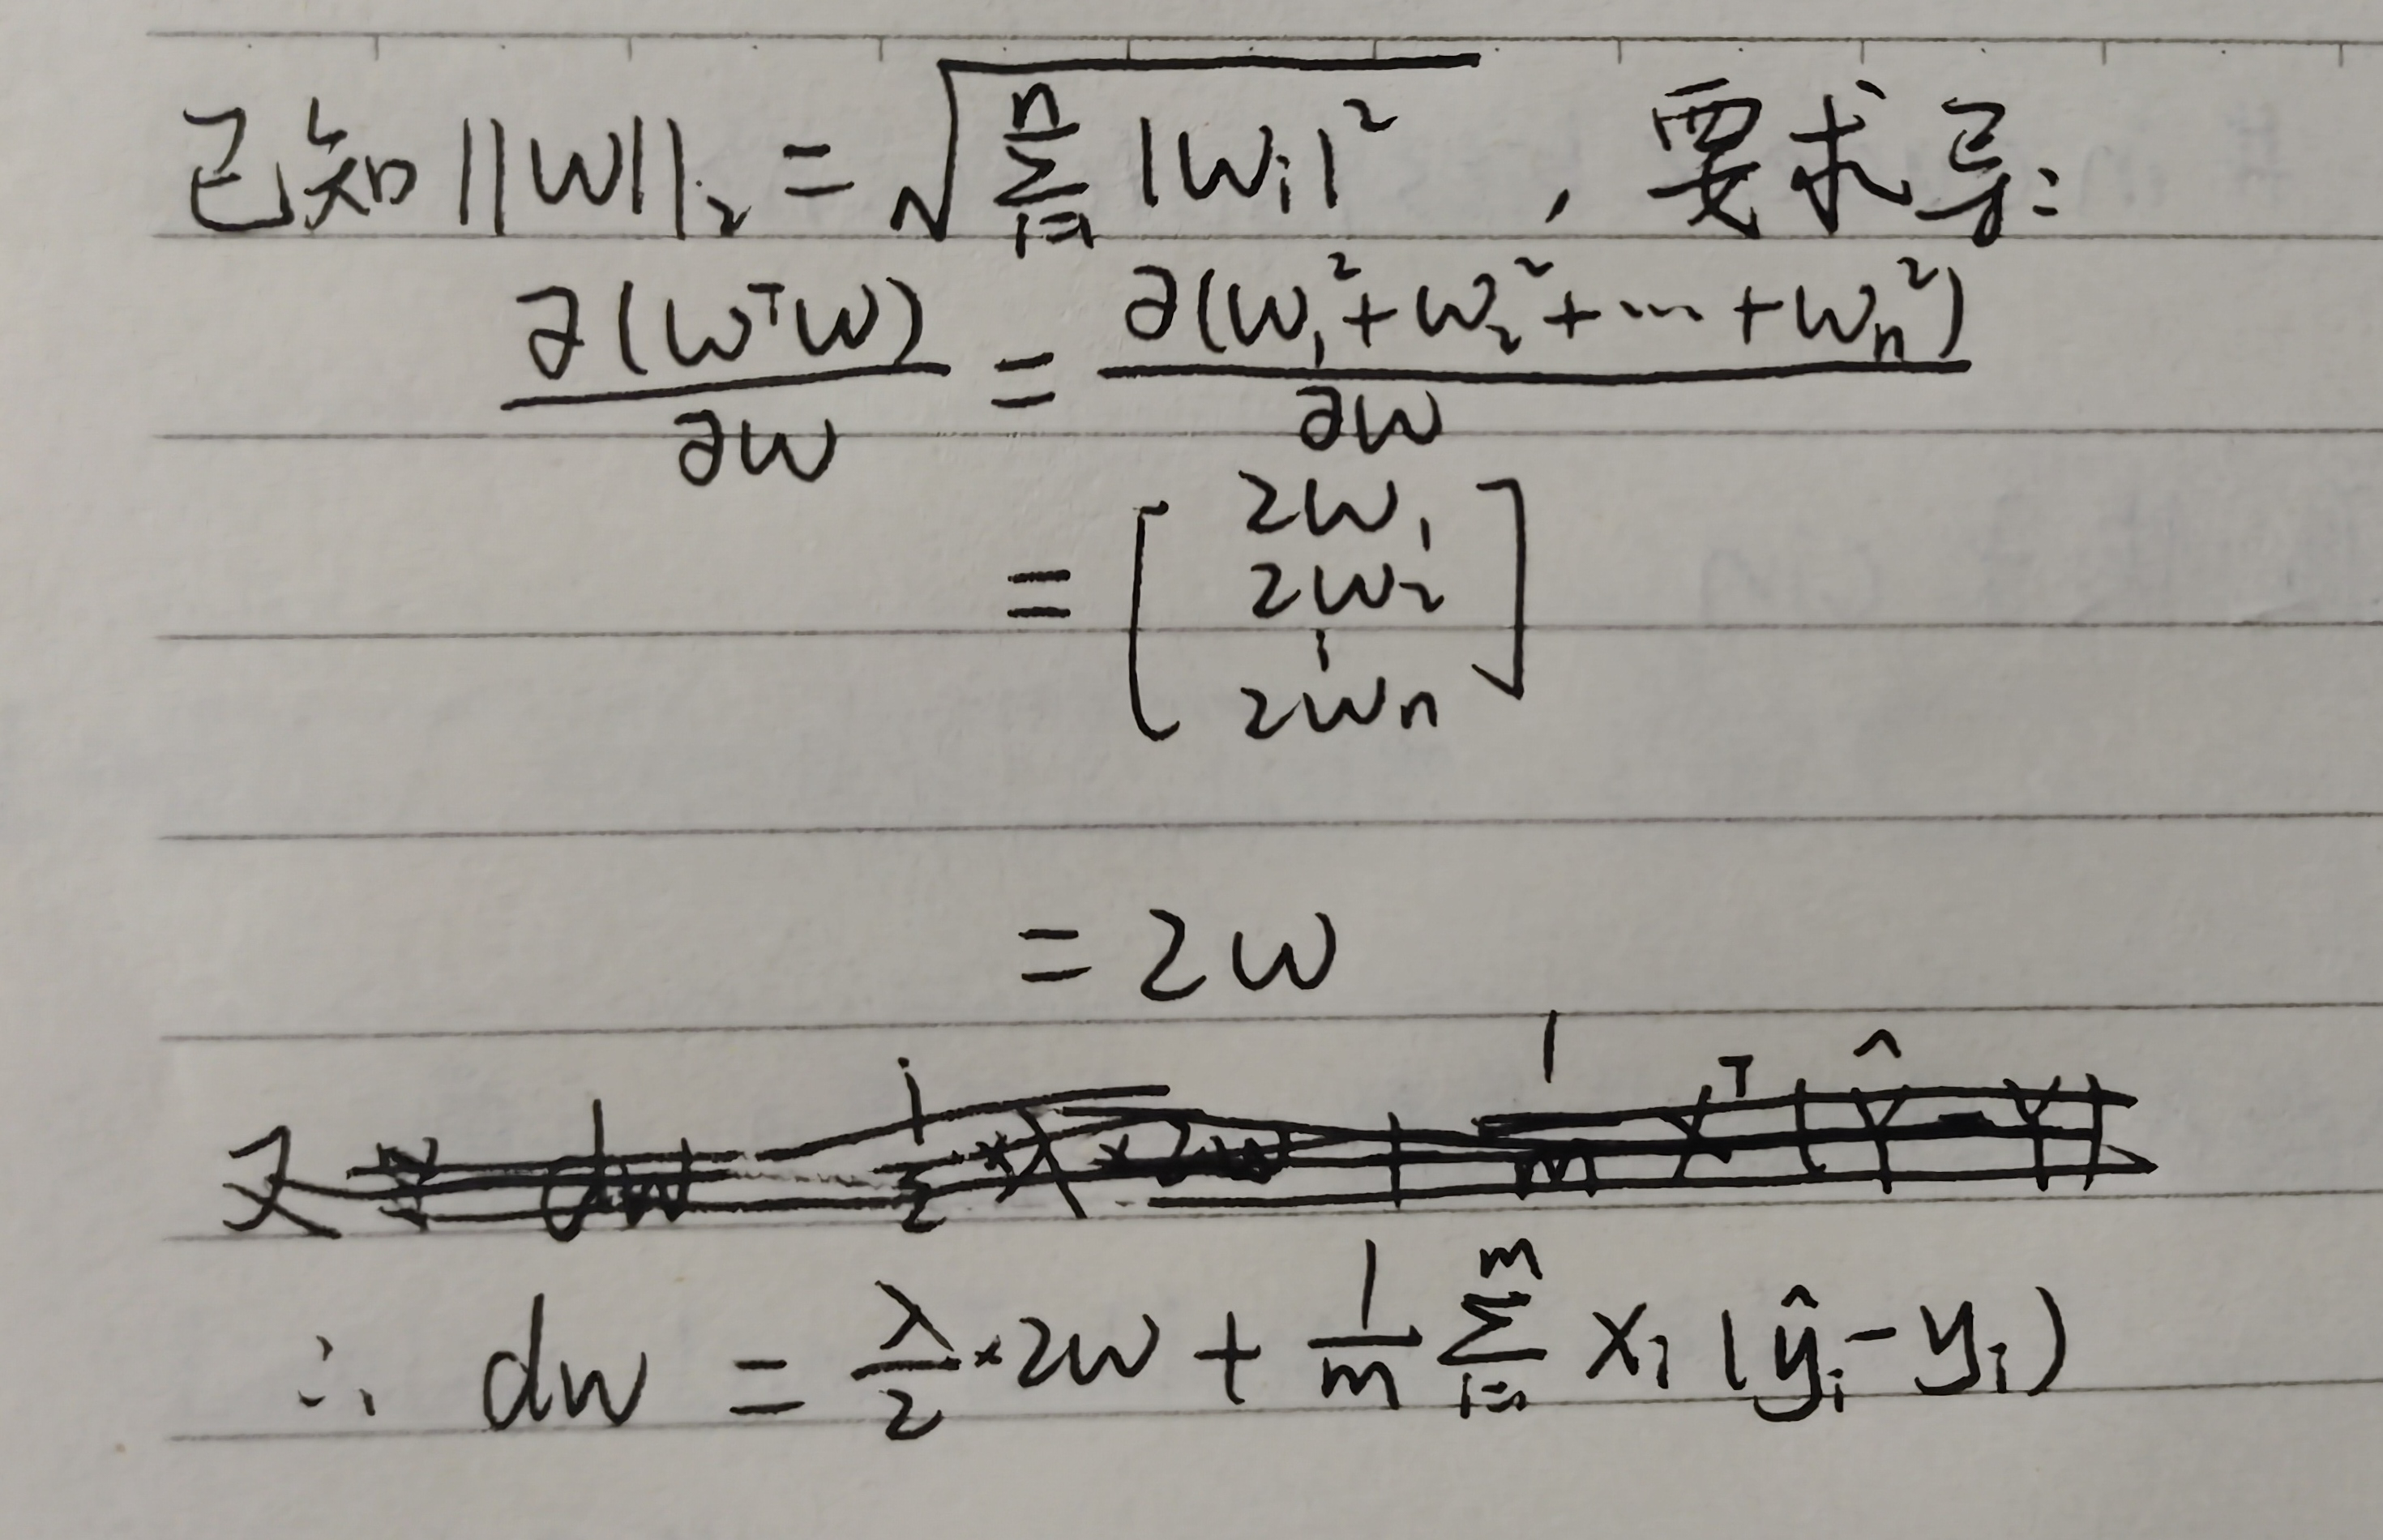

In [177]:
def linearRegression(X,Y, alpha, iters):
    W_=[]
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) 
    for i in range (iters):
        W=gradientDescent(X, Y, W, alpha)
        tmp = W.copy()
        W_.append(tmp)
    return  W_ 
    

In [178]:
def predict(X, W):
    y_pre = np.dot(X,W)
    return y_pre

In [179]:
alpha =0.001
iters = 10000
W_ = linearRegression(x_train,y_train, alpha, iters)
loss_train=[]
loss_test=[]
for w in W_:
    loss_train.append(computeCost(x_train, y_train, w))
    loss_test.append(computeCost(x_test, y_test, w))

        接下来绘制训练损失和测试损失的图像

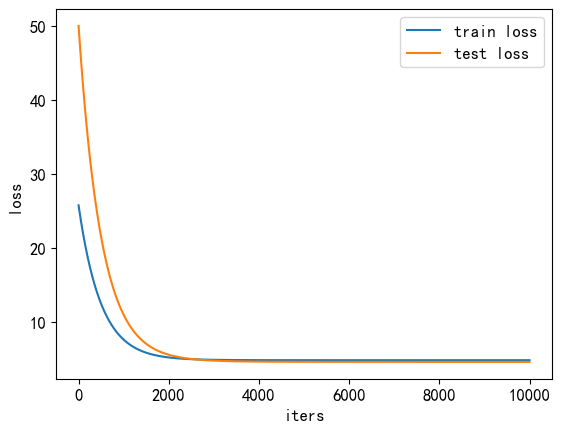

In [180]:
plt.plot(np.arange(iters), loss_train, label='train loss')
plt.plot(np.arange(iters), loss_test, label='test loss')
plt.legend()
plt.xlabel('iters')
plt.ylabel('loss ')
plt.show()

In [181]:
lsq_w = np.linalg.inv(x_train[:, 1:2].T@x_train[:, 1:2])@x_train[:, 1:2].T@y_train
lsq_b = np.sum(y_train-lsq_w *x_train[:, 1:2])/x_train.shape[0]#最小二乘法
lsq_w=lsq_w.reshape((-1))

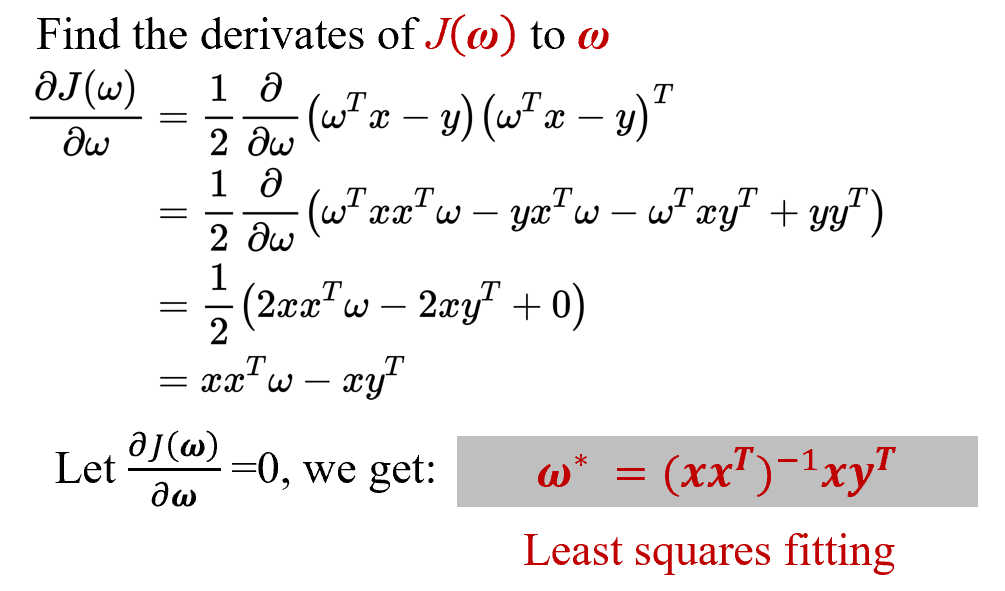

In [182]:
X_test = np.linspace(x_test.min(), x_test.max(), 100)
Y_test =  W_[len(W_)-1][1] * X_test+W_[len(W_)-1][0]   
X_train = np.linspace(x_train.min(), x_train.max(), 100)
Y_train = W_[len(W_)-1][1] * X_train+W_[len(W_)-1][0]
lsq_train =lsq_b + lsq_w * X_train
lsq_test = lsq_b + lsq_w * X_test


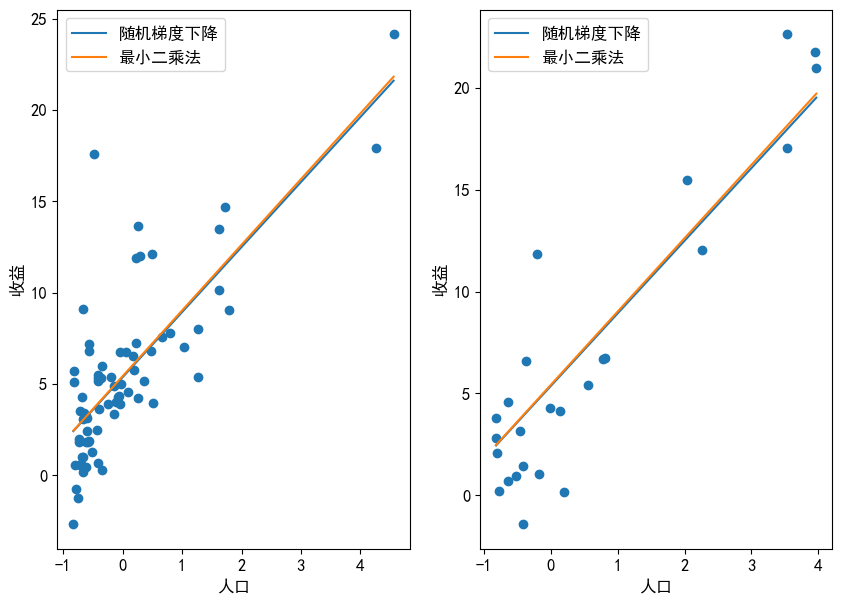

In [183]:
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 1:2], y_train)
plt.plot(X_train,  Y_train, label='随机梯度下降')
plt.plot(X_train, lsq_train, label='最小二乘法')
plt.legend()
plt.xlabel('人口')
plt.ylabel('收益')
plt.subplot(1, 2, 2)
plt.scatter(x_test[:, 1:2], y_test)
plt.plot(X_test, Y_test, label='随机梯度下降')
plt.plot(X_test, lsq_test, label='最小二乘法')
plt.legend()
plt.xlabel('人口')
plt.ylabel('收益')
plt.show()

        左图是训练数据
        右图是测试数据
  